In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df= pd.read_excel('Task_2.xlsx')

In [43]:
df.head()

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1


# 1) Column wise analysis


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   VIN                            100 non-null    object        
 1   TRANSACTION_ID                 100 non-null    int64         
 2   CORRECTION_VERBATIM            100 non-null    object        
 3   CUSTOMER_VERBATIM              100 non-null    object        
 4   REPAIR_DATE                    100 non-null    datetime64[ns]
 5   CAUSAL_PART_NM                 95 non-null     object        
 6   GLOBAL_LABOR_CODE_DESCRIPTION  100 non-null    object        
 7   PLATFORM                       100 non-null    object        
 8   BODY_STYLE                     100 non-null    object        
 9   VPPC                           100 non-null    object        
 10  PLANT                          99 non-null     object        
 11  BUILD_COUNTRY       

In [45]:
df.describe()

,TRANSACTION_ID,REPAIR_DATE,DEALER_REGION,REPAIR_AGE,KM,COMPLAINT_CD_CSI,ORD_SELLING_SRC_CD,GLOBAL_LABOR_CODE,CAMPAIGN_NBR,REPORTING_COST,TOTALCOST,LBRCOST,TRANSMISSION_SOURCE_PLANT,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
count,100.000000,100,100.00000,100.000000,100.000000,100.0,100.000000,100.000000,0.0,100.000000,94.000000,100.000000,8.800000e+01,1.000000e+02,100.000000,100.0,98.000000,100.000000,100.00000
mean,13036.900000,2024-01-22 07:26:24,1.09000,14.940000,24914.230000,0.0,24.590000,251.900000,NaN,531.193200,561.162128,106.344900,1.676383e+08,2.815767e+09,5.720000,1.0,14.132653,0.070000,1.09000
min,13021.000000,2024-01-02 00:00:00,1.00000,0.000000,3.000000,0.0,11.000000,20.000000,NaN,27.690000,27.690000,20.000000,2.878270e+05,2.808842e+09,2.000000,1.0,10.000000,0.000000,1.00000
25%,13027.750000,2024-01-12 00:00:00,1.00000,5.000000,8883.250000,0.0,13.000000,130.000000,NaN,305.432500,320.105000,61.855000,2.878270e+05,2.809436e+09,4.000000,1.0,10.000000,0.000000,1.00000
50%,13036.000000,2024-01-24 12:00:00,1.00000,12.000000,21962.000000,0.0,13.000000,130.000000,NaN,433.970000,457.225000,78.560000,8.042172e+06,2.820097e+09,4.000000,1.0,10.000000,0.000000,1.00000
75%,13041.250000,2024-02-01 00:00:00,1.00000,21.000000,35493.250000,0.0,48.000000,130.000000,NaN,554.062500,606.905000,108.055000,1.774929e+07,2.820880e+09,6.000000,1.0,16.000000,0.000000,1.00000
max,13081.000000,2024-02-07 00:00:00,4.00000,50.000000,107905.000000,0.0,72.000000,2400.000000,NaN,2457.450000,3205.450000,1012.670000,8.282984e+08,2.823000e+09,26.000000,1.0,37.000000,1.000000,4.00000
std,12.028166,NaN,0.51434,12.367945,20747.078206,0.0,17.822976,546.451722,NaN,411.161608,452.796836,113.223074,3.237538e+08,5.790727e+06,4.040402,0.0,6.694570,0.256432,0.51434


In [46]:
# Count missing values per column
missing_values = df.isnull().sum()
print(missing_values)


VIN                                0
TRANSACTION_ID                     0
CORRECTION_VERBATIM                0
CUSTOMER_VERBATIM                  0
REPAIR_DATE                        0
CAUSAL_PART_NM                     5
GLOBAL_LABOR_CODE_DESCRIPTION      0
PLATFORM                           0
BODY_STYLE                         0
VPPC                               0
PLANT                              1
BUILD_COUNTRY                      0
LAST_KNOWN_DLR_NAME                0
LAST_KNOWN_DLR_CITY                0
REPAIRING_DEALER_CODE              0
DEALER_NAME                        0
REPAIR_DLR_CITY                    0
STATE                              2
DEALER_REGION                      0
REPAIR_DLR_POSTAL_CD               2
REPAIR_AGE                         0
KM                                 0
COMPLAINT_CD_CSI                   0
COMPLAINT_CD                       0
VEH_TEST_GRP                       2
COUNTRY_SALE_ISO                   0
ORD_SELLING_SRC_CD                 0
O

In [47]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts().sum(), "\n")

VIN: 98 unique values
100 

TRANSACTION_ID: 32 unique values
100 

CORRECTION_VERBATIM: 93 unique values
100 

CUSTOMER_VERBATIM: 100 unique values
100 

REPAIR_DATE: 29 unique values
100 

CAUSAL_PART_NM: 18 unique values
95 

GLOBAL_LABOR_CODE_DESCRIPTION: 4 unique values
100 

PLATFORM: 11 unique values
100 

BODY_STYLE: 6 unique values
100 

VPPC: 26 unique values
100 

PLANT: 11 unique values
99 

BUILD_COUNTRY: 3 unique values
100 

LAST_KNOWN_DLR_NAME: 100 unique values
100 

LAST_KNOWN_DLR_CITY: 94 unique values
100 

REPAIRING_DEALER_CODE: 95 unique values
100 

DEALER_NAME: 100 unique values
100 

REPAIR_DLR_CITY: 93 unique values
100 

STATE: 39 unique values
98 

DEALER_REGION: 2 unique values
100 

REPAIR_DLR_POSTAL_CD: 92 unique values
98 

REPAIR_AGE: 35 unique values
100 

KM: 100 unique values
100 

COMPLAINT_CD_CSI: 1 unique values
100 

COMPLAINT_CD: 7 unique values
100 

VEH_TEST_GRP: 23 unique values
98 

COUNTRY_SALE_ISO: 6 unique values
100 

ORD_SELLING_SRC_CD: 

In [48]:
# Selected only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Calculating the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

                           TRANSACTION_ID  DEALER_REGION  REPAIR_AGE  \
TRANSACTION_ID                   1.000000      -0.067105   -0.027201   
DEALER_REGION                   -0.067105       1.000000    0.043730   
REPAIR_AGE                      -0.027201       0.043730    1.000000   
KM                              -0.038570       0.244591    0.741879   
COMPLAINT_CD_CSI                      NaN            NaN         NaN   
ORD_SELLING_SRC_CD              -0.022386       0.470161    0.038471   
GLOBAL_LABOR_CODE                0.035637      -0.039428   -0.052293   
CAMPAIGN_NBR                          NaN            NaN         NaN   
REPORTING_COST                   0.240835      -0.088291   -0.249648   
TOTALCOST                        0.261337      -0.094882   -0.247707   
LBRCOST                          0.051153      -0.105307   -0.060561   
TRANSMISSION_SOURCE_PLANT       -0.094220      -0.096158    0.176525   
SRC_TXN_ID                       0.654961      -0.064121    0.03

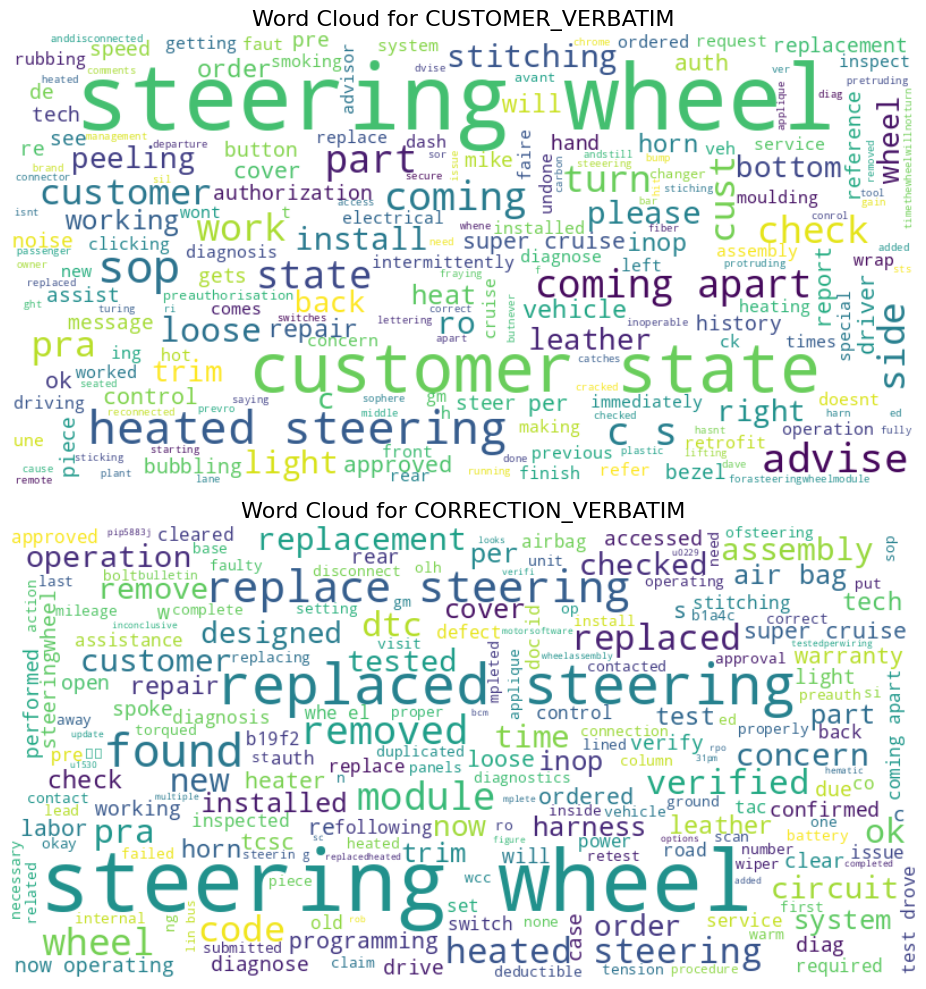

In [63]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud for CUSTOMER_VERBATIM
customer_text = ' '.join(df['CUSTOMER_VERBATIM'].dropna())
wordcloud_customer = WordCloud(width=800, height=400, background_color='white').generate(customer_text)

# Generate word cloud for CORRECTION_VERBATIM
correction_text = ' '.join(df['CORRECTION_VERBATIM'].dropna())
wordcloud_correction = WordCloud(width=800, height=400, background_color='white').generate(correction_text)

# Plotting the word clouds
plt.figure(figsize=(14, 10))

# Plot for CUSTOMER_VERBATIM
plt.subplot(2, 1, 1)
plt.imshow(wordcloud_customer, interpolation='bilinear')
plt.title('Word Cloud for CUSTOMER_VERBATIM', fontsize=16)
plt.axis('off')

# Plot for CORRECTION_VERBATIM
plt.subplot(2, 1, 2)
plt.imshow(wordcloud_correction, interpolation='bilinear')
plt.title('Word Cloud for CORRECTION_VERBATIM', fontsize=16)
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
sns.histplot(df, kde=True)
plt.show()

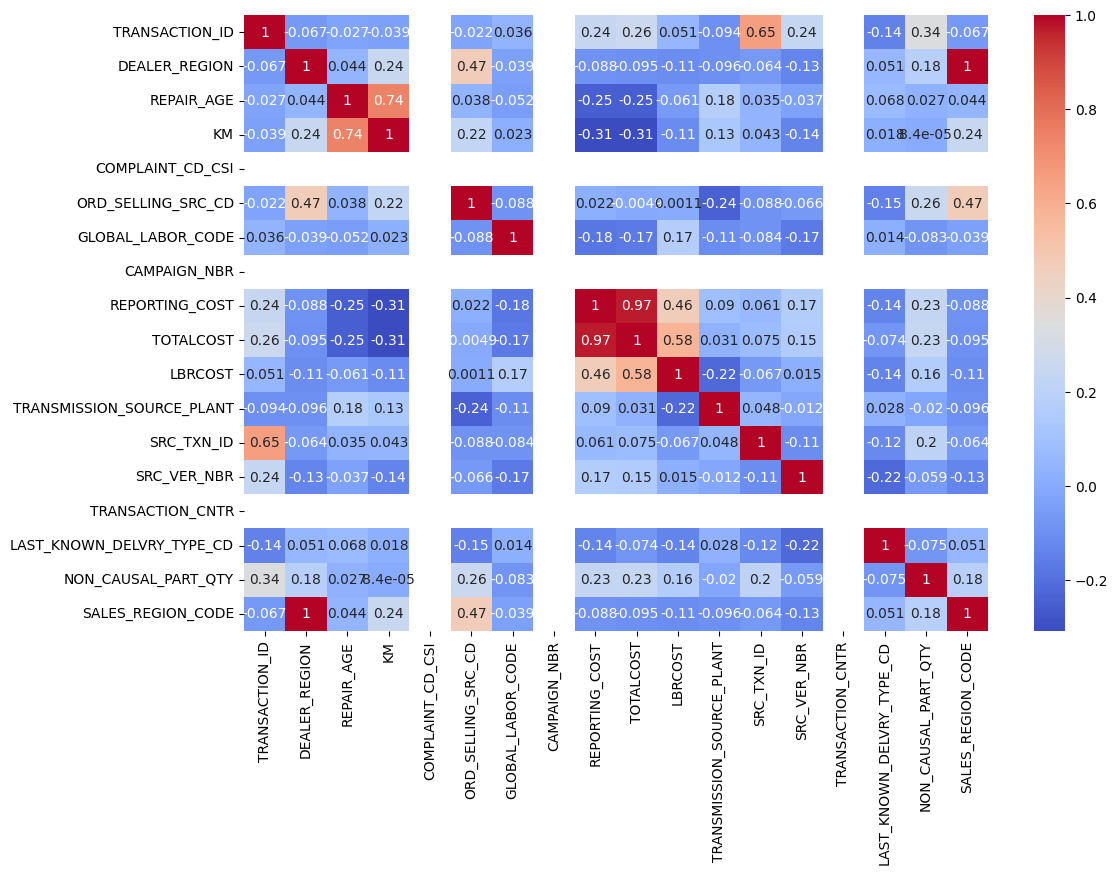

In [49]:
# Example: Correlation heatmap
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns only
correlation_matrix = numeric_df.corr()

# Generate the heatmap using the correlation matrix of numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# 2)Data Cleaning:

In [50]:
# Checking for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

VIN                                0
TRANSACTION_ID                     0
CORRECTION_VERBATIM                0
CUSTOMER_VERBATIM                  0
REPAIR_DATE                        0
CAUSAL_PART_NM                     5
GLOBAL_LABOR_CODE_DESCRIPTION      0
PLATFORM                           0
BODY_STYLE                         0
VPPC                               0
PLANT                              1
BUILD_COUNTRY                      0
LAST_KNOWN_DLR_NAME                0
LAST_KNOWN_DLR_CITY                0
REPAIRING_DEALER_CODE              0
DEALER_NAME                        0
REPAIR_DLR_CITY                    0
STATE                              2
DEALER_REGION                      0
REPAIR_DLR_POSTAL_CD               2
REPAIR_AGE                         0
KM                                 0
COMPLAINT_CD_CSI                   0
COMPLAINT_CD                       0
VEH_TEST_GRP                       2
COUNTRY_SALE_ISO                   0
ORD_SELLING_SRC_CD                 0
O

In [51]:
# Step 1: Identify columns with missing values and their data types
missing_summary = df.isnull().sum()
columns_with_missing = missing_summary[missing_summary > 0].index
data_types = df.dtypes

# Step 2: Handle missing numeric values (median imputation)
numeric_columns = columns_with_missing[data_types[columns_with_missing].isin(['float64', 'int64'])]
for column in numeric_columns:
    df[column].fillna(df[column].median(), inplace=True)

# Step 3: Handle missing categorical values (mode imputation or "Unknown")
categorical_columns = columns_with_missing[data_types[columns_with_missing] == 'object']
for column in categorical_columns:
    most_common = df[column].mode()[0] if not df[column].mode().empty else "Unknown"
    df[column].fillna(most_common, inplace=True)

# Step 4: Drop columns with high missing values (>50%)
high_missing_columns = missing_summary[missing_summary > 0.5 * len(df)].index
df.drop(columns=high_missing_columns, inplace=True)

# Recheck for missing values
remaining_missing = df.isnull().sum()

remaining_missing


<ipython-input-51-39ccb3c70b55>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
<ipython-input-51-39ccb3c70b55>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

,0
VIN,0
TRANSACTION_ID,0
CORRECTION_VERBATIM,0
CUSTOMER_VERBATIM,0
REPAIR_DATE,0
CAUSAL_PART_NM,0
GLOBAL_LABOR_CODE_DESCRIPTION,0
PLATFORM,0
BODY_STYLE,0
VPPC,0


In [52]:
# Step 1: Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Step 2: Standardize case and trim whitespaces
for column in categorical_columns:
    df[column] = df[column].str.strip().str.lower()

# Step 3: Review unique values in categorical columns to find inconsistencies
# Instead of sum, get the number of unique values
unique_values_summary = {col: df[col].nunique() for col in categorical_columns}

# Print the summary
print(unique_values_summary)

{'VIN': 98, 'CORRECTION_VERBATIM': 88, 'CUSTOMER_VERBATIM': 100, 'CAUSAL_PART_NM': 18, 'GLOBAL_LABOR_CODE_DESCRIPTION': 4, 'PLATFORM': 11, 'BODY_STYLE': 6, 'VPPC': 26, 'PLANT': 11, 'BUILD_COUNTRY': 3, 'LAST_KNOWN_DLR_NAME': 100, 'LAST_KNOWN_DLR_CITY': 94, 'REPAIRING_DEALER_CODE': 95, 'DEALER_NAME': 100, 'REPAIR_DLR_CITY': 93, 'STATE': 39, 'REPAIR_DLR_POSTAL_CD': 12, 'COMPLAINT_CD': 7, 'VEH_TEST_GRP': 23, 'COUNTRY_SALE_ISO': 6, 'OPTN_FAMLY_CERTIFICATION': 3, 'OPTF_FAMLY_EMISSIOF_SYSTEM': 8, 'TRANSACTION_CATEGORY': 2, 'ENGINE': 12, 'ENGINE_DESC': 12, 'TRANSMISSION': 19, 'TRANSMISSION_DESC': 20, 'ENGINE_SOURCE_PLANT': 1, 'ENGINE_TRACE_NBR': 83, 'TRANSMISSION_TRACE_NBR': 88, 'MEDIA_FLAG': 2, 'VIN_MODL_DESGTR': 41, 'LINE_SERIES': 19}


In [53]:
# Step 1: Check numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Step 2: Detect and handle outliers
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with median
    median_value = df[column].median()
    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = median_value


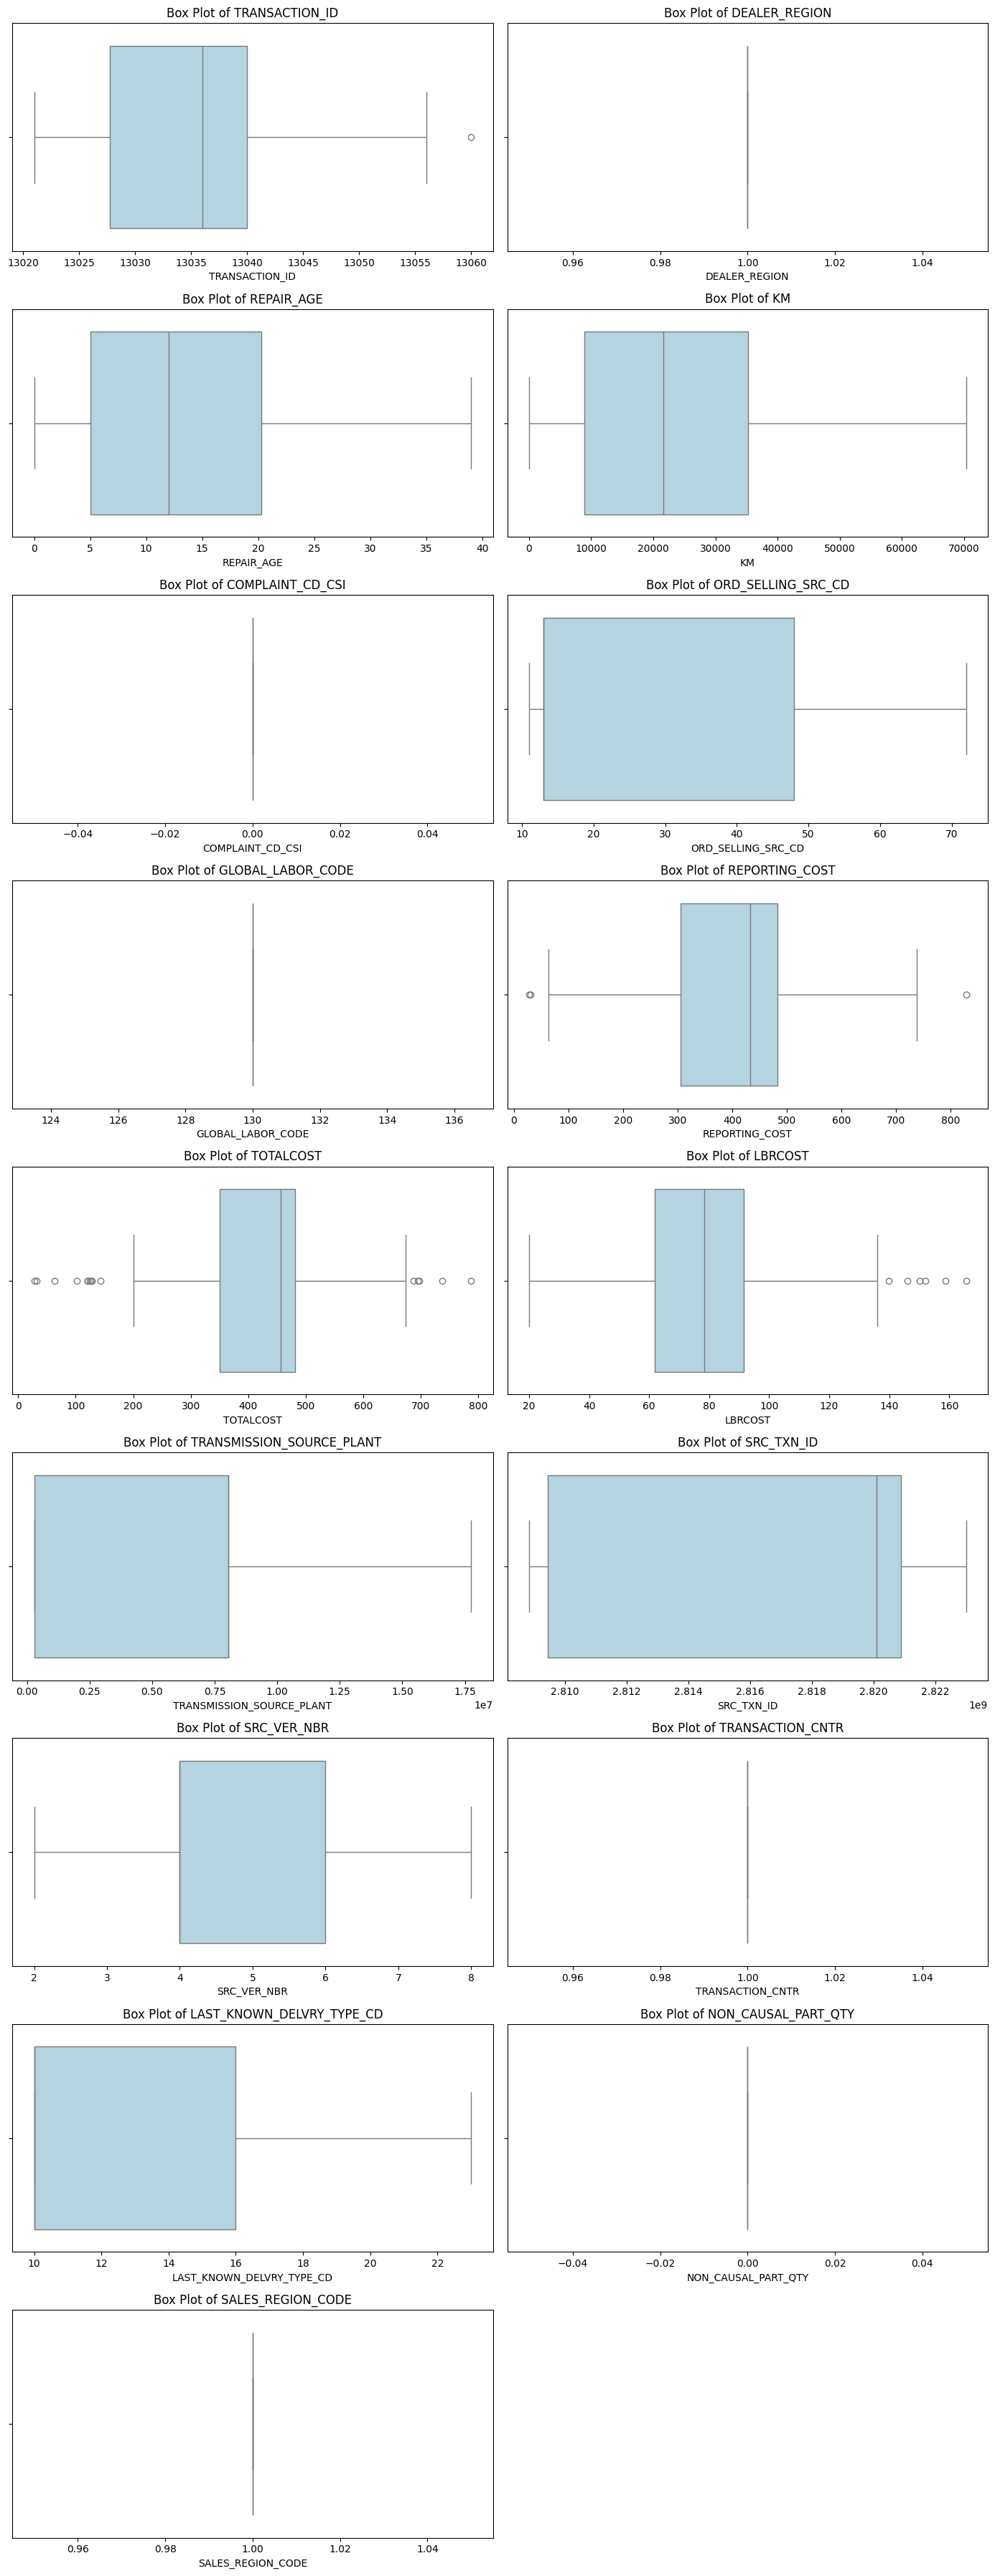

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure with enough space for all subplots
num_cols = len(numerical_columns)
num_rows = (num_cols + 1) // 2  # Calculate rows to accommodate all columns
plt.figure(figsize=(14, 4 * num_rows))  # Adjust figure height based on rows

# Plot box plots for all numerical columns
for i, column in enumerate(numerical_columns):
    plt.subplot(num_rows, 2, i + 1)  # Use calculated rows and 2 columns
    sns.boxplot(data=df, x=column, color='lightblue')
    plt.title(f'Box Plot of {column}', fontsize=12)
    plt.xlabel(column, fontsize=10)

plt.tight_layout()
plt.show()

# 3)Identifying Critical Columns:

According to my analysis this 5 are the most important columns.

1.	TOTALCOST
2.	CAUSAL_PART_NM
3.	CUSTOMER_VERBATIM
4.	PLATFORM
5.	REPAIR_DATE


Based on the dataset provided, the top 5 critical columns that are likely most insightful for stakeholders are:

#1. TOTALCOST
This column directly represents the financial impact of each repair transaction, making it crucial for cost analysis and budgeting.
Potential Insights: Identify high-cost repairs, trends in repair costs over time, and their correlation with vehicle type or region.
#2. CAUSAL_PART_NM
 Highlights the parts most frequently associated with repairs, helping stakeholders identify quality issues or supply chain inefficiencies.
Potential Insights: Pinpoint frequently failing components to optimize manufacturing or supply chain decisions.
#3. CUSTOMER_VERBATIM
Captures the voice of the customer, providing insights into recurring issues or dissatisfaction.
Potential Insights: Perform sentiment analysis or keyword extraction to prioritize customer pain points.
#4. PLATFORM
Groups vehicles by platform, allowing stakeholders to analyze patterns across different product lines.
Potential Insights: Compare performance and repair trends across platforms to make product-line-specific improvements.
#5. REPAIR_DATE
Tracks the timeline of repairs, enabling trend analysis over time.
Potential Insights: Identify seasonal spikes in repairs or track the effectiveness of recent manufacturing improvements.

<ipython-input-19-12a090643e85>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_cost.index, y=platform_cost.values, palette="viridis")


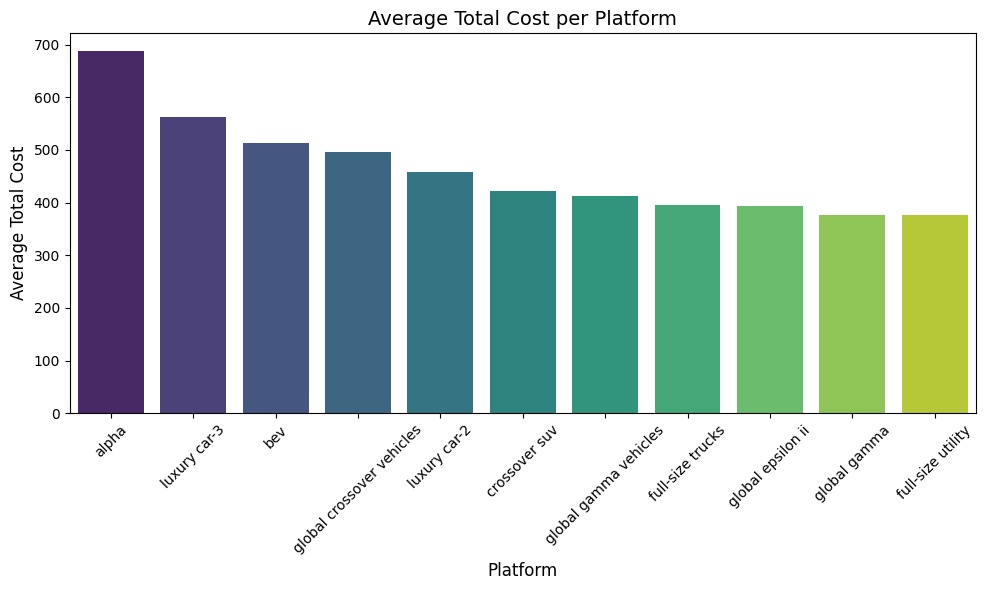

<ipython-input-19-12a090643e85>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_parts.values, y=top_parts.index, palette="coolwarm")


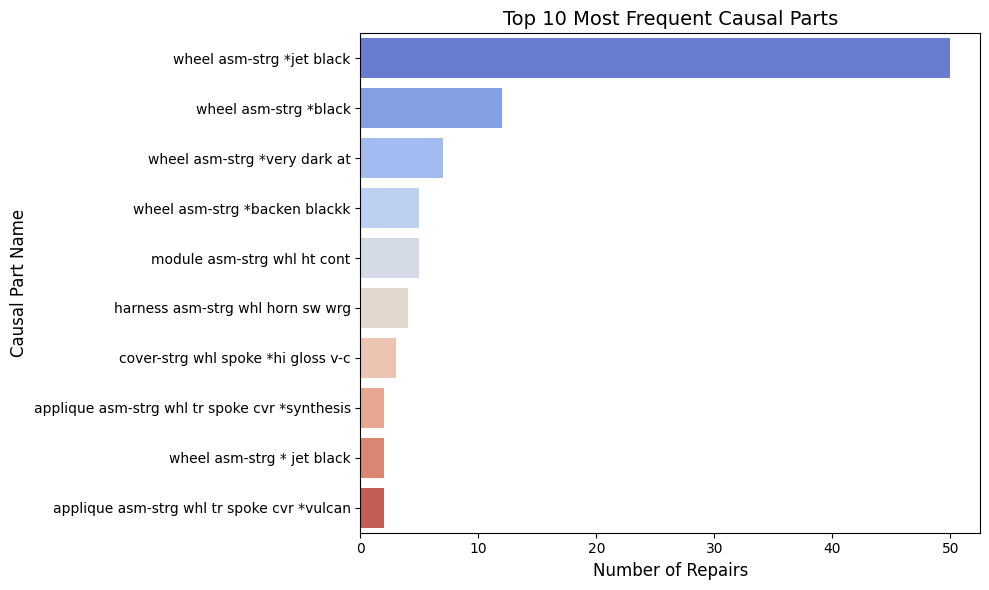

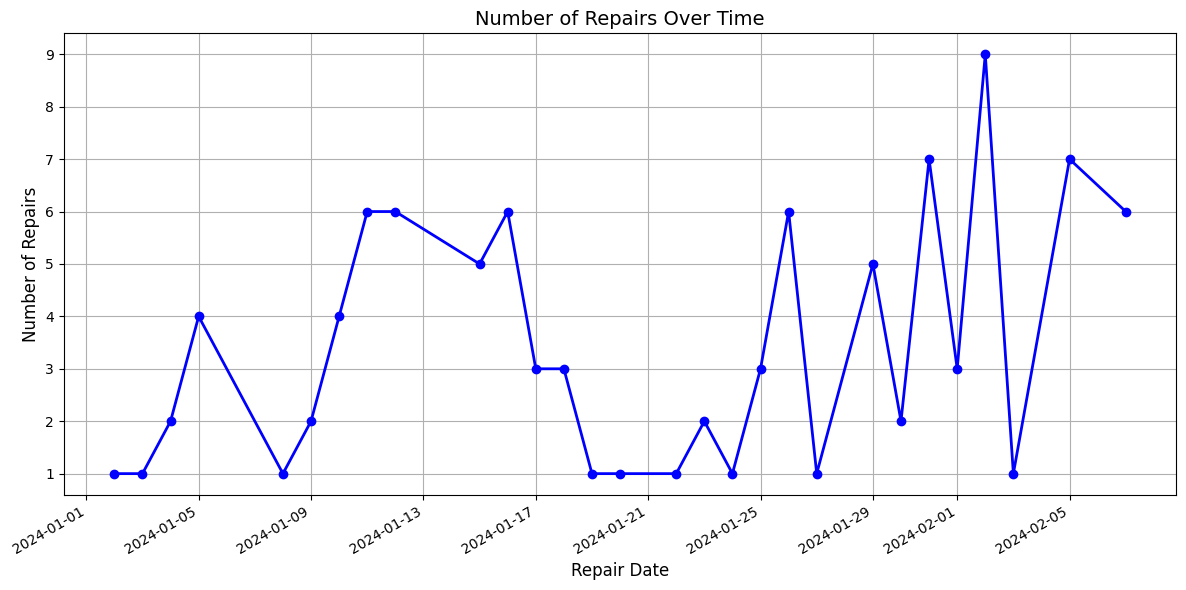

In [ ]:


# Ensure matplotlib plots render in the notebook
#plt.style.use('seaborn')

# Step 1: Total Cost Distribution (Bar Plot for Total Cost per Platform)
platform_cost = df.groupby('PLATFORM')['TOTALCOST'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=platform_cost.index, y=platform_cost.values, palette="viridis")
plt.title('Average Total Cost per Platform', fontsize=14)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Average Total Cost', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 2: Frequency of Repairs for Top Causal Parts (Bar Plot)
top_parts = df['CAUSAL_PART_NM'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_parts.values, y=top_parts.index, palette="coolwarm")
plt.title('Top 10 Most Frequent Causal Parts', fontsize=14)
plt.xlabel('Number of Repairs', fontsize=12)
plt.ylabel('Causal Part Name', fontsize=12)
plt.tight_layout()
plt.show()

# Step 3: Repairs Over Time (Line Plot for Number of Repairs by Date)
repairs_by_date = df.groupby('REPAIR_DATE').size()

plt.figure(figsize=(12, 6))
repairs_by_date.plot(kind='line', marker='o', color='b', linewidth=2)
plt.title('Number of Repairs Over Time', fontsize=14)
plt.xlabel('Repair Date', fontsize=12)
plt.ylabel('Number of Repairs', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


#4) Generating tags

In [37]:
df1= df.copy()

In [66]:
# Step 1: Preprocess the text data
text_data = df1['CUSTOMER_VERBATIM'].fillna('') + " " + df1['CORRECTION_VERBATIM'].fillna('')

# Step 2: Preprocess the text function
def preprocess_text(text):
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

text_data = text_data.apply(preprocess_text)

# Step 3: Use TF-IDF to extract keywords
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), max_features=100, ngram_range=(1, 2))
tfidf_matrix = vectorizer.fit_transform(text_data)
keywords = vectorizer.get_feature_names_out()

# Step 4: Categorize keywords into failure conditions and components
failure_conditions = ['alignment', 'stall', 'overheating', 'noise', 'vibration', 'failure', 'leak']
components = ['steering', 'engine', 'brake', 'transmission', 'wheel', 'battery', 'sensor']

# Create functions to categorize tags
def get_failure_tags(text):
    return [word for word in text.split() if any(condition in word for condition in failure_conditions)]

def get_component_tags(text):
    return [word for word in text.split() if any(component in word for component in components)]

# Apply functions to the text data and store results in new columns
df1['Failure_Tags'] = text_data.apply(lambda x: get_failure_tags(x))
df1['Component_Tags'] = text_data.apply(lambda x: get_component_tags(x))

# Display the DataFrame with new columns
print(df1.head())


                 VIN  TRANSACTION_ID  \
0  3HCFDDE89SH220903           13021   
1  1HRFFEE8XSZ230636           13028   
2  1HYKSMRK6SZ000990           13035   
3  3HCFDFEL3SH241701           13021   
4  1HRFFHEL1RZ181474           13021   

                                 CORRECTION_VERBATIM  \
0                   REPLACED STEERING WHEEL NOW OKAY   
1  CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...   
2  APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...   
3                         STEERING WHEEL REPLACEMENT   
4      REPLACED STEERING MESSAGE NO LONGER DISPLAYED   

                                   CUSTOMER_VERBATIM REPAIR_DATE  \
0                        STEERING WHEEL COMING APART  2024-01-02   
1         CUSTOMER STATES HEATED STEERING WHEEL INOP  2024-01-03   
2  OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...  2024-01-04   
3  CUSTOMER STATES THE LETTERING AND FINISH ON TH...  2024-01-04   
4  C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...  2024-01-05   

             

#5) Summary and Insights  

From the free-text fields (CUSTOMER_VERBATIM and CORRECTION_VERBATIM), we generated tags focusing on failure conditions and components that are critical for understanding the common issues in the dataset. Here are the potential insights derived from these tags:

#1. Failure Condition Tags:
Generated Tags: alignment issue, engine stall, brake noise, overheating, vibration, leak, failure
Potential Insights:
Common Problems: Identifying these tags can help stakeholders prioritize the most common failure conditions. For example, if "overheating" is prevalent, it might suggest issues with cooling systems or inadequate maintenance.
Preventive Measures: By understanding the frequency of failure conditions, proactive measures can be implemented to reduce the occurrence of specific issues.
Impact Analysis: Correlating these tags with repair costs can highlight which failure conditions are most costly to fix, aiding in resource allocation and cost management.
#2. Component Tags:
Generated Tags: steering wheel, engine assembly, brake sensor, transmission module, wheel, battery, sensor
Potential Insights:
Critical Components: Understanding which components are mentioned most frequently can help prioritize quality control efforts and design improvements in manufacturing.
Supply Chain Optimization: If certain components like brake sensor or engine assembly are frequently associated with issues, it might indicate a need for better supplier partnerships or parts inspection protocols.
Maintenance Scheduling: Knowing which components are most involved in repairs can help schedule preventive maintenance or replacements more effectively.
#Overall Potential Insights:
Trends Over Time: By examining how the frequency of these tags changes over time (e.g., via a time series analysis), we can identify emerging issues or improvements in product reliability.
Geographic Analysis: When combined with location data, these tags can reveal region-specific issues that might require targeted interventions.
Customer Experience: Analyzing tags in the CUSTOMER_VERBATIM field can shed light on customer satisfaction, pinpointing recurring pain points and areas for improved customer service.
Cost Management: Correlating tags with repair costs can provide a clearer picture of which issues are most expensive to address, facilitating better budget planning.

#2)

Based on the analysis of failure condition and component tags, here are actionable recommendations for stakeholders:

#Prioritize Common Issues:
Address frequent failure conditions like alignment issues and brake noise through targeted quality control and preventive maintenance.
#Enhance Component Quality:
 Focus on high-failure components such as steering wheels and engine assemblies by improving supplier inspection processes.
Customer Support Improvement: Utilize insights from customer feedback to train support teams, enhancing service and customer education.
#Optimize Preventive Maintenance:
Implement a data-driven maintenance schedule to prevent costly repairs, focusing on the most frequently tagged components.
#Budget Allocation:
 Direct resources to address high-cost failure conditions, ensuring optimal use of financial resources.
#Continuous Monitoring:
Regularly analyze new data to stay updated on emerging issues and adjust strategies accordingly.
#Advanced Analytics:
Use machine learning to predict potential failures, enabling proactive measures.

#Summary:
Focus on prioritizing common issues, enhancing component quality, improving customer support, and optimizing maintenance schedules. Regular data reviews and machine learning can help stay ahead of emerging issues, ensuring efficient resource use and better customer satisfaction.








#3)

#Missing Values (Nulls):

**Issue**: Several columns had missing or null values, which could affect data analysis and accuracy.
**Approach**: I identified these missing values and used data imputation techniques where possible, such as filling with the mean/median for numerical columns or the mode for categorical columns. In cases where imputation wasn't suitable, rows were removed to maintain data integrity.

#Invalid or Incorrect Data Formats:

**Issue**: Some numerical columns had values stored as text, causing errors in analysis. Additionally, dates might not have been in the correct format.
**Approach**: I converted columns to appropriate data types (e.g., converting text to integers or floats) and standardized date formats using Python’s pd.to_datetime() function.

#Duplicate Entries:

**Issue**: Duplicate rows could skew analysis and lead to incorrect insights.
**Approach**: I checked for duplicate entries and removed them using drop_duplicates() to ensure that the analysis was based on unique records.

#Inconsistent Categorical Data:

**Issue**: Some categorical columns contained typos or different capitalization (e.g., Engine vs. engine).
**Approach**: I standardized categorical data by converting text to lowercase and correcting known inconsistencies.

#Missing Primary Keys:

**Issue**: Absence of a primary key column could make it difficult to uniquely identify records and track them.
**Approach**: I identified potential unique identifiers and ensured that they were consistently populated. For cases where primary keys were missing, I considered adding a synthetic unique identifier.

#Summary of Approach:
To address these discrepancies, I used a combination of data-cleaning techniques like imputation, type conversion. This ensured that the dataset was clean, reliable, and ready for further analysis.








In [67]:
# Save the tagged dataset
output_path = "tagged_dataset2_1.csv"
df.to_csv(output_path, index=False)